Задача 1 Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [3]:
b = ((zp * ks).mean() - zp.mean() * ks.mean()) / ((zp ** 2).mean() - (zp.mean() ** 2))
b

2.620538882402765

In [4]:
a = ks.mean() - b * zp.mean()
a

444.1773573243596

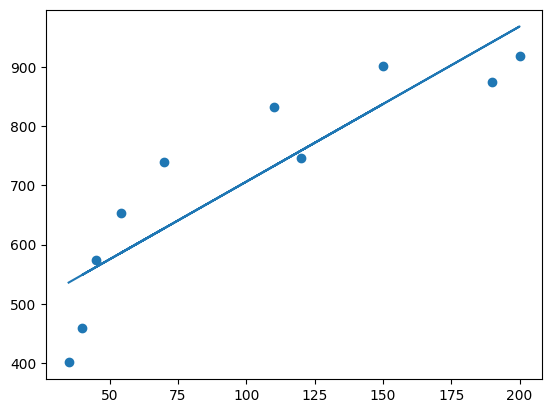

In [5]:
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp)

In [6]:
mse = np.sum(((a + b * zp) - ks) ** 2 / 10)
mse

6470.414201176659

Intercept

In [7]:
zp = np.vstack([np.ones((1, 10)), zp])

In [8]:
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)

array([444.17735732,   2.62053888])

Без Intercept

In [17]:
zp = zp.reshape(1, len(zp))
ks = ks.reshape(1, len(ks))

In [18]:
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)

array([[5.88982042]])

In [19]:
mse = np.sum(((0 + 5.88982042 * zp) - ks) ** 2 / 10)
mse

56516.85841571942

In [21]:
def mse (B1, y=ks, X=zp, n=10):
    return np.sum((B1 * X - y) ** 2) / n

In [22]:
mse (5.88982042)

56516.85841571943

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).

In [9]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [10]:
alpha = 1e-6

In [11]:
B1 = 0.1

In [12]:
n = 10

In [13]:
def mse_(B1, y=ks, X=zp, n=10):
    return np.sum((B1 * X - y) ** 2) / n

In [16]:
for i in range(1000):
    B1 -= alpha * (2/n) * np.sum((B1* zp - ks)* zp)
    print ('B1 = {}'.format(B1))

B1 = 5.8898204201285544
B1 = 5.889820420128668
B1 = 5.889820420128779
B1 = 5.889820420128887
B1 = 5.889820420128991
B1 = 5.889820420129094
B1 = 5.889820420129193
B1 = 5.889820420129289
B1 = 5.889820420129382
B1 = 5.889820420129474
B1 = 5.8898204201295625
B1 = 5.889820420129649
B1 = 5.889820420129732
B1 = 5.889820420129814
B1 = 5.889820420129893
B1 = 5.88982042012997
B1 = 5.889820420130045
B1 = 5.889820420130118
B1 = 5.889820420130189
B1 = 5.889820420130258
B1 = 5.889820420130325
B1 = 5.889820420130389
B1 = 5.8898204201304525
B1 = 5.889820420130514
B1 = 5.889820420130573
B1 = 5.889820420130632
B1 = 5.889820420130689
B1 = 5.889820420130744
B1 = 5.889820420130797
B1 = 5.8898204201308495
B1 = 5.8898204201309
B1 = 5.889820420130949
B1 = 5.889820420130997
B1 = 5.889820420131043
B1 = 5.889820420131088
B1 = 5.889820420131133
B1 = 5.8898204201311755
B1 = 5.889820420131217
B1 = 5.889820420131258
B1 = 5.889820420131297
B1 = 5.889820420131335
B1 = 5.889820420131373
B1 = 5.889820420131409
B1 = 5.88